Can we confidently attribute observed extreme events to climate change? A statitical formulation (from Hansen _et al._, 2014) provides a way to construct confidence intervals for so-called attributable risk. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from itertools import product

import seaborn; seaborn.set_context("poster")

In [2]:
mu = 0.5
beta = 1.5


The length of records are $T_1$ and $T_2$, the ratio of the two is $\tau$. 


In [3]:
T1 = 20
T2 = 10
tau = T1/T2


The conditional probability of observing $x$ and $y$ is 


$\mathrm{prob}(X=x, Y=y) = \frac{[\mu(T_1 + \beta T_2)]^{x+y}\exp{[-\mu (T_1 + \beta T_2)]}}{(x+y)!} \times \frac{(x+y)!}{x!y!}[\tau / (\tau+\beta)]^x [\beta/(\tau + \beta)]^y]$



In [4]:
def jointProb(x, y, mu, beta, T1, T2):
    tau = T1/T2
    xyfac = np.misc.factorial(x + y)
    xfac = np.misc.factorial(x)
    yfac = np.misc.factorial(y)
    totalobs = np.power(mu*(T1 + beta * T2), x + y) * np.exp(-mu * (T1 + beta * T2)) / xyfac
    condprob = (xyfac / (xfac * yfac) ) * np.power(tau/(tau + beta), x) * \
                np.power(beta/(tau + beta), y)
    pr = totalobs * condprob
    
    return pr

        

The attributable risk 

In [5]:
def attributable(x, y, tau):
    return 1. - x / (tau * y)

Calculate the confidence intervals $p_L$ and $p_U$:

In [6]:
def confidence(x, y, alpha, tau):
    
    
    if y == 0:
        return None
    
    n = x + y 
    q = x/n
    if x == 0:
        p_U = 1 - np.power(alpha, 1./n)
        p_L = 1. - (1. - np.power(alpha, 1./n)) / (tau * np.power(alpha, 1./n))
        return p_L, p_U
    
    z = norm.ppf(alpha/2.)
    
    det = np.sqrt(q * (1 - q) + z*z/(4 * n))
    a = (x + z*z/2) / (n + z*z) 
    b = z*np.sqrt(n) / (n + z*z)
    L = a - b * det
    U = a + b * det
    
    beta_U = tau * (1. - U) / U
    beta_L = tau * (1. - L) / L
    
    p_L = 1. - 1./beta_L
    p_U = 1. - 1./beta_U
    
    return p_L, p_U

In [14]:
def plot_results(x, y):
    tau = np.array([0.5, 1., 2., 3., 4., 5.])
    alpha = 0.05
    vatt = np.vectorize(attributable)
    vconf = np.vectorize(confidence)
    
    p = vatt(x, y, tau)
    pL, pU = vconf(x, y, alpha, tau)
    
    fig, ax = plt.subplots(1, figsize=(8,4))
    
    ax.plot(tau, p, c='red', label='Probability')
    if x == 0.:
        ax.fill_between(tau, pL, 1, color='red', alpha=0.25)
    else:
        ax.fill_between(tau, pL, pU, color='red', alpha=0.25)
    ax.set_xlabel(r"Ratio of time periods ($\tau$)")
    ax.set_ylabel("Probability")
    ax.set_xlim((tau.min(), tau.max()))
    ax.set_ylim((0, 1))
            

<function __main__.plot_results>

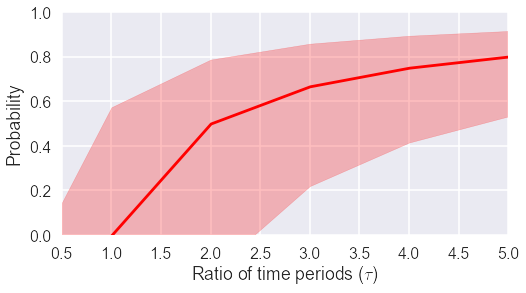

In [15]:
from IPython.html.widgets import interact, FloatSlider
x = FloatSlider(min=0,max=100, step=1, value=10, description="Pre-climate change events")
y = FloatSlider(min=1,max=200, step=1, value=10, description="Post-climate change events")
interact(plot_results, x=x, y=y)
